# a_2d_image_data

In [1]:
import os
import imageio.v2 as imageio
import torch

In [2]:
img_arr = imageio.imread(os.path.join(os.path.pardir, os.path.pardir, "_00_data", "a_image-dog", "bobby.jpg")) #이미지 불러오기 os.path.pardir은 상위 라이브러리로 이동
print(type(img_arr))
print(img_arr.shape)
print(img_arr.dtype)

img = torch.from_numpy(img_arr) #numpy 배열을 Tensor로 변환
out = img.permute(2, 0, 1) #이미지의 차원 순서 변경
print(out.shape)

<class 'numpy.ndarray'>
(720, 1280, 3)
uint8
torch.Size([3, 720, 1280])


In [3]:
data_dir = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "b_image-cats")
filenames = [
  name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png' #확장자가 png인 파일들의 이름 수집
]
print(filenames)

['cat3.png', 'cat1.png', 'cat2.png']


In [4]:
from PIL import Image

for i, filename in enumerate(filenames):
  image = Image.open(os.path.join(data_dir, filename)) #이미지 파일 열기
  image.show() #이미지를 화면에 표시
  img_arr = imageio.imread(os.path.join(data_dir, filename)) #이미지를 넘파이 배열로 읽어옴
  print(img_arr.shape)
  print(img_arr.dtype)

batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8) #3개의 이미지를 저장할 batch 텐서 생성

for i, filename in enumerate(filenames):
  img_arr = imageio.imread(os.path.join(data_dir, filename))
  img_t = torch.from_numpy(img_arr) #tensor로 변환
  img_t = img_t.permute(2, 0, 1) #차원 순서 변경
  img_t = img_t[:3]
  batch[i] = img_t

print(batch.shape)

(256, 256, 3)
uint8
(256, 256, 3)
uint8
(256, 256, 3)
uint8
torch.Size([3, 3, 256, 256])


In [5]:
batch = batch.float()
batch /= 255.0 #normalization
print(batch.dtype)
print(batch.shape)

n_channels = batch.shape[1] #배치 내의 채널의 수를 저장

for c in range(n_channels): # normalization 작업
  mean = torch.mean(batch[:, c]) #평균 계산
  std = torch.std(batch[:, c]) #표준 편차 계산
  batch[:, c] = (batch[:, c] - mean) / std

torch.float32
torch.Size([3, 3, 256, 256])


# b_3d_image_data

In [6]:
import os

import imageio.v2 as imageio

In [7]:
dir_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "c_volumetric-dicom", "2-LUNG_3.0_B70f-04083")
vol_array = imageio.volread(dir_path, format='DICOM') 
print(type(vol_array))  #numpy 배열임
print(vol_array.shape)   
print(vol_array.dtype)   
print(vol_array[0])

Reading DICOM (examining files): 1/99 files (1.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 99/99  (100.0%)
<class 'imageio.core.util.Array'>
(99, 512, 512)
int16
[[ -985  -990  -999 ... -1017 -1008  -971]
 [-1016  -984  -963 ... -1000 -1009  -999]
 [-1024 -1008  -996 ...  -979 -1021  -987]
 ...
 [ -920  -942  -944 ...  -893  -917  -955]
 [ -871  -879  -905 ...  -895  -869  -867]
 [ -876  -855  -873 ...  -933  -982  -936]]


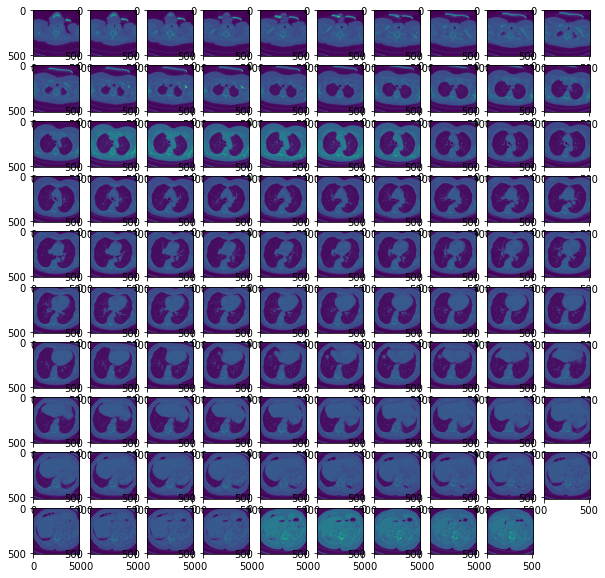

In [8]:
import matplotlib.pyplot as plt #데이터를 시각화 하는 라이브러리

fig = plt.figure(figsize=(10, 10))
for id in range(0, 99):
  fig.add_subplot(10, 10, id + 1) #id +1 위치에 subplot 추가
  plt.imshow(vol_array[id])
plt.show()

In [9]:
import torch

vol = torch.from_numpy(vol_array).float()
vol = torch.unsqueeze(vol, 0)  #배치 차원을 추가
vol = torch.unsqueeze(vol, 1)  #data size

print(vol.shape)

torch.Size([1, 1, 99, 512, 512])


In [10]:
mean = torch.mean(vol, dim=(3, 4), keepdim=True) # data 정규화 과정
print(mean.shape)
std = torch.std(vol, dim=(3, 4), keepdim=True)
print(std.shape)
vol = (vol - mean) / std
print(vol.shape)

print(vol[0, 0, 0])

torch.Size([1, 1, 99, 1, 1])
torch.Size([1, 1, 99, 1, 1])
torch.Size([1, 1, 99, 512, 512])
tensor([[-1.0002, -1.0102, -1.0283,  ..., -1.0645, -1.0464, -0.9720],
        [-1.0625, -0.9982, -0.9560,  ..., -1.0303, -1.0484, -1.0283],
        [-1.0785, -1.0464, -1.0223,  ..., -0.9881, -1.0725, -1.0042],
        ...,
        [-0.8696, -0.9138, -0.9178,  ..., -0.8153, -0.8636, -0.9399],
        [-0.7711, -0.7872, -0.8394,  ..., -0.8194, -0.7671, -0.7631],
        [-0.7812, -0.7390, -0.7752,  ..., -0.8957, -0.9941, -0.9017]])


# c_tabular_wine_data

In [11]:
import csv
import os
import numpy as np

In [12]:
wine_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "d_tabular-wine", "winequality-white.csv")
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1) 
print(wineq_numpy.dtype) #float 32
print(wineq_numpy.shape) #(4898, 12) -> Data size * feature
print(wineq_numpy)
print()

col_list = next(csv.reader(open(wine_path), delimiter=';')) #첫번째 행을 읽는 코드
print(col_list)
print()

float32
(4898, 12)
[[ 7.    0.27  0.36 ...  0.45  8.8   6.  ]
 [ 6.3   0.3   0.34 ...  0.49  9.5   6.  ]
 [ 8.1   0.28  0.4  ...  0.44 10.1   6.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   6.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   7.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   6.  ]]

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']



In [13]:
import torch

wineq = torch.from_numpy(wineq_numpy)
print(wineq.dtype)
print(wineq.shape)
print()

data = wineq[:, :-1]  # 마지막 열의 행을 제외한 모든 열 저장
print(data.dtype)
print(data.shape)
print(data)
print()

target = wineq[:, -1]  # 모든행과 마지막 열 저장
print(target.dtype)
print(target.shape)
print(target)
print()

target = target.long()  #텐서의 데이터 타입을 long으로 변환
print(target.dtype)
print(target.shape)
print(target)
print()

torch.float32
torch.Size([4898, 12])

torch.float32
torch.Size([4898, 11])
tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
        [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
        [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
        ...,
        [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
        [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
        [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]])

torch.float32
torch.Size([4898])
tensor([6., 6., 6.,  ..., 6., 7., 6.])

torch.int64
torch.Size([4898])
tensor([6, 6, 6,  ..., 6, 7, 6])



In [14]:
eye_matrix = torch.eye(10) #크기가 10인 단위 행렬 생성

onehot_target = eye_matrix[target] # one-hot encoding을 수행하기 위한 target 변경

print(onehot_target.shape)  
print(onehot_target[0])
print(onehot_target[1])
print(onehot_target[-2])
print(onehot_target)

torch.Size([4898, 10])
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [15]:
data_mean = torch.mean(data, dim=0) #normalization
data_var = torch.var(data, dim=0)
data = (data - data_mean) / torch.sqrt(data_var)
print(data)

tensor([[ 1.7208e-01, -8.1761e-02,  2.1326e-01,  ..., -1.2468e+00,
         -3.4915e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  4.7996e-02,  ...,  7.3995e-01,
          1.3422e-03, -8.2419e-01],
        [ 1.4756e+00,  1.7450e-02,  5.4378e-01,  ...,  4.7505e-01,
         -4.3677e-01, -3.3663e-01],
        ...,
        [-4.2043e-01, -3.7940e-01, -1.1915e+00,  ..., -1.3130e+00,
         -2.6153e-01, -9.0545e-01],
        [-1.6054e+00,  1.1666e-01, -2.8253e-01,  ...,  1.0049e+00,
         -9.6251e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  3.7852e-01,  ...,  4.7505e-01,
         -1.4882e+00,  1.0448e+00]])


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(data, onehot_target, test_size=0.2) #데이터를 target과 train, 검증 데이터로 분리

print(X_train.shape)
print(y_train.shape)

print(X_valid.shape)
print(y_valid.shape)

torch.Size([3918, 11])
torch.Size([3918, 10])
torch.Size([980, 11])
torch.Size([980, 10])


In [17]:
def get_wine_data():
  wine_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "d_tabular-wine", "winequality-white.csv")
  wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)

  wineq = torch.from_numpy(wineq_numpy)

  data = wineq[:, :-1]  # Selects all rows and all columns except the last
  target = wineq[:, -1].long()  # treat labels as an integer

  eye_matrix = torch.eye(10)
  onehot_target = eye_matrix[target]

  data_mean = torch.mean(data, dim=0)
  data_var = torch.var(data, dim=0)
  data = (data - data_mean) / torch.sqrt(data_var)

  X_train, X_valid, y_train, y_valid = train_test_split(data, onehot_target, test_size=0.2)

  return X_train, X_valid, y_train, y_valid

# d_tabular_california_housing

In [18]:
# https://medium.com/analytics-vidhya/implement-linear-regression-on-boston-housing-dataset-by-pytorch-c5d29546f938
# https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

import torch
import torch
from sklearn.datasets import fetch_california_housing

In [19]:
housing = fetch_california_housing()
print(housing.keys())

print(type(housing.data))
print(housing.data.dtype)
print(housing.data.shape) #(206040, 8) Data Size * features
print(housing.feature_names)

print(housing.target.shape) #레이블 데이터의 shape
print(housing.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
<class 'numpy.ndarray'>
float64
(20640, 8)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
(20640,)
['MedHouseVal']


In [20]:
import numpy as np

print(housing.data.min(), housing.data.max()) 

data_mean = np.mean(housing.data, axis=0)
data_var = np.var(housing.data, axis=0)
data = (housing.data - data_mean) / np.sqrt(data_var)
target = housing.target

print(data.min(), data.max())

-124.35 35682.0
-2.3859923416733877 119.41910318829312


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(data, target, test_size=0.2)

X_train = torch.from_numpy(X_train)
X_valid = torch.from_numpy(X_valid)
y_train = torch.from_numpy(y_train)
y_valid = torch.from_numpy(y_valid)

print(X_train.shape)
print(y_train.shape)

print(X_valid.shape)
print(y_valid.shape)

torch.Size([16512, 8])
torch.Size([16512])
torch.Size([4128, 8])
torch.Size([4128])


# e_time_series_data

In [22]:
import os
import numpy as np
import torch

In [23]:
torch.set_printoptions(edgeitems=2, threshold=50, linewidth=75)

bikes_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "e_time-series-bike-sharing-dataset", "hour-fixed.csv") #시계열 데이터

bikes_numpy = np.loadtxt(
  fname=bikes_path, dtype=np.float32, delimiter=",", skiprows=1,
  converters={
    1: lambda x: float(x[8:10])  #일시를 float으로 변경
  }
)

bikes = torch.from_numpy(bikes_numpy)
print(bikes.shape)
print(bikes)

daily_bikes = bikes.view(-1, 24, bikes.shape[1])
print(daily_bikes.shape)  # 730일

daily_bikes_data = daily_bikes[:, :, :-1]
daily_bikes_target = daily_bikes[:, :, -1].unsqueeze(dim=-1)

print(daily_bikes_data.shape)
print(daily_bikes_target.shape)

torch.Size([17520, 17])
tensor([[1.0000e+00, 1.0000e+00,  ..., 1.3000e+01, 1.6000e+01],
        [2.0000e+00, 1.0000e+00,  ..., 3.2000e+01, 4.0000e+01],
        ...,
        [1.7378e+04, 3.1000e+01,  ..., 4.8000e+01, 6.1000e+01],
        [1.7379e+04, 3.1000e+01,  ..., 3.7000e+01, 4.9000e+01]])
torch.Size([730, 24, 17])
torch.Size([730, 24, 16])
torch.Size([730, 24, 1])


In [24]:
first_day_data = daily_bikes_data[0]
print(first_day_data.shape)

w
print(first_day_data[:, 9].long())
eye_matrix = torch.eye(4) #단위 행렬 생성
print(eye_matrix)

weather_onehot = eye_matrix[first_day_data[:, 9].long() - 1] #날씨를 원핫 벡터로 행렬에서 추출
print(weather_onehot.shape)
print(weather_onehot)

first_day_data_torch = torch.cat(tensors=(first_day_data, weather_onehot), dim=1)
print(first_day_data_torch.shape)
print(first_day_data_torch)

torch.Size([24, 16])
tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2,
        2, 2])
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])
torch.Size([24, 4])
tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])
torch.Size([24, 20])
tensor([[ 1.,  1.,  ...,  0.,  0.],
        [ 2.,  1.,  ...,  0.,  0.],
        ...,
        [23.,  1.,  ...,  0.,  0.],
        [24.,  1.,  ...,  0.,  0.]])


In [25]:
day_data_torch_list = []
for daily_idx in range(daily_bikes_data.shape[0]):  #범위는 일(730)
  day = daily_bikes_data[daily_idx] 
  weather_onehot = eye_matrix[day[:, 9].long() - 1]
  day_data_torch = torch.cat(tensors=(day, weather_onehot), dim=1)  #하루 시간 계절 원핫-벡터를 cat [24, 20]
  day_data_torch_list.append(day_data_torch)

print(len(day_data_torch_list))
daily_bikes_data = torch.stack(day_data_torch_list, dim=0)
print(daily_bikes_data.shape)


730
torch.Size([730, 24, 20])


In [26]:
print(daily_bikes_data[:, :, :9].shape, daily_bikes_data[:, :, 10:].shape)
daily_bikes_data = torch.cat(
  [daily_bikes_data[:, :, :9], daily_bikes_data[:, :, 10:]],
  dim=2
)
print(daily_bikes_data.shape)

temperatures = daily_bikes_data[:, :, 9]
daily_bikes_data[:, :, 9] = (daily_bikes_data[:, :, 9] - torch.mean(temperatures)) / torch.std(temperatures)

# daily_bikes_data = daily_bikes_data.transpose(1, 2)
print(daily_bikes_data.shape)  # >>> torch.Size([730, 17, 24])

torch.Size([730, 24, 9]) torch.Size([730, 24, 10])
torch.Size([730, 24, 19])
torch.Size([730, 24, 19])


# f_audio_data

In [27]:
import torch
import os
import scipy.io.wavfile as wavfile

In [28]:
audio_1_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "f_audio-chirp", "1-100038-A-14.wav") #소리 데이터
audio_2_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "f_audio-chirp", "1-100210-A-36.wav")

freq_1, waveform_arr_1 = wavfile.read(audio_1_path) #소리 데이터를 넘파이 배열로 읽어옴
print(freq_1) 
print(type(waveform_arr_1)) 
print(len(waveform_arr_1)) #44100 * 5 = 220500
print(waveform_arr_1)

freq_2, waveform_arr_2 = wavfile.read(audio_2_path)

waveform = torch.empty(2, 1, 220_500) 
waveform[0, 0] = torch.from_numpy(waveform_arr_1).float()
waveform[1, 0] = torch.from_numpy(waveform_arr_2).float()
print(waveform.shape)

44100
<class 'numpy.ndarray'>
220500
[ -388 -3387 -4634 ...  2289  1327    90]
torch.Size([2, 1, 220500])


In [29]:
from scipy import signal

_, _, sp_arr_1 = signal.spectrogram(waveform_arr_1, freq_1)
_, _, sp_arr_2 = signal.spectrogram(waveform_arr_2, freq_2)

sp_1 = torch.from_numpy(sp_arr_1)
sp_2 = torch.from_numpy(sp_arr_2)
print(sp_1.shape) #주파수 * 시간
print(sp_2.shape)

sp_left_t = torch.from_numpy(sp_arr_1)
sp_right_t = torch.from_numpy(sp_arr_2)
print(sp_left_t.shape)
print(sp_right_t.shape)

sp_t = torch.stack((sp_left_t, sp_right_t), dim=0).unsqueeze(dim=0)  #[1, 2, 129, 984] -> Data size * Channel * Frequency * Time
print(sp_t.shape)

torch.Size([129, 984])
torch.Size([129, 984])
torch.Size([129, 984])
torch.Size([129, 984])
torch.Size([1, 2, 129, 984])


# g_video_data

In [30]:
import torch
import os
import imageio

In [31]:
video_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "g_video-cockatoo", "cockatoo.mp4") #비디오 데이터

reader = imageio.get_reader(video_path)
print(type(reader))
meta = reader.get_meta_data()
print(meta)

<class 'imageio.plugins.ffmpeg.FfmpegFormat.Reader'>
{'plugin': 'ffmpeg', 'nframes': inf, 'ffmpeg_version': '4.2.2-static https://johnvansickle.com/ffmpeg/ built with gcc 8 (Debian 8.3.0-6)', 'codec': 'h264', 'pix_fmt': 'yuv420p(tv, bt709)', 'audio_codec': 'aac', 'fps': 29.53, 'source_size': (480, 360), 'size': (480, 360), 'rotate': 0, 'duration': 17.93}


In [32]:
for i, frame in enumerate(reader):
  frame = torch.from_numpy(frame).float()  
  print(i, frame.shape)   

n_channels = 3
n_frames = 529
video = torch.empty(1, n_frames, n_channels, *meta['size'])  # (1, 529, 3, 480, 360) -> Data size  * Channel * Time * height * width
print(video.shape)

0 torch.Size([360, 480, 3])
1 torch.Size([360, 480, 3])
2 torch.Size([360, 480, 3])
3 torch.Size([360, 480, 3])
4 torch.Size([360, 480, 3])
5 torch.Size([360, 480, 3])
6 torch.Size([360, 480, 3])
7 torch.Size([360, 480, 3])
8 torch.Size([360, 480, 3])
9 torch.Size([360, 480, 3])
10 torch.Size([360, 480, 3])
11 torch.Size([360, 480, 3])
12 torch.Size([360, 480, 3])
13 torch.Size([360, 480, 3])
14 torch.Size([360, 480, 3])
15 torch.Size([360, 480, 3])
16 torch.Size([360, 480, 3])
17 torch.Size([360, 480, 3])
18 torch.Size([360, 480, 3])
19 torch.Size([360, 480, 3])
20 torch.Size([360, 480, 3])
21 torch.Size([360, 480, 3])
22 torch.Size([360, 480, 3])
23 torch.Size([360, 480, 3])
24 torch.Size([360, 480, 3])
25 torch.Size([360, 480, 3])
26 torch.Size([360, 480, 3])
27 torch.Size([360, 480, 3])
28 torch.Size([360, 480, 3])
29 torch.Size([360, 480, 3])
30 torch.Size([360, 480, 3])
31 torch.Size([360, 480, 3])
32 torch.Size([360, 480, 3])
33 torch.Size([360, 480, 3])
34 torch.Size([360, 480,

435 torch.Size([360, 480, 3])
436 torch.Size([360, 480, 3])
437 torch.Size([360, 480, 3])
438 torch.Size([360, 480, 3])
439 torch.Size([360, 480, 3])
440 torch.Size([360, 480, 3])
441 torch.Size([360, 480, 3])
442 torch.Size([360, 480, 3])
443 torch.Size([360, 480, 3])
444 torch.Size([360, 480, 3])
445 torch.Size([360, 480, 3])
446 torch.Size([360, 480, 3])
447 torch.Size([360, 480, 3])
448 torch.Size([360, 480, 3])
449 torch.Size([360, 480, 3])
450 torch.Size([360, 480, 3])
451 torch.Size([360, 480, 3])
452 torch.Size([360, 480, 3])
453 torch.Size([360, 480, 3])
454 torch.Size([360, 480, 3])
455 torch.Size([360, 480, 3])
456 torch.Size([360, 480, 3])
457 torch.Size([360, 480, 3])
458 torch.Size([360, 480, 3])
459 torch.Size([360, 480, 3])
460 torch.Size([360, 480, 3])
461 torch.Size([360, 480, 3])
462 torch.Size([360, 480, 3])
463 torch.Size([360, 480, 3])
464 torch.Size([360, 480, 3])
465 torch.Size([360, 480, 3])
466 torch.Size([360, 480, 3])
467 torch.Size([360, 480, 3])
468 torch.

In [33]:
for i, frame in enumerate(reader):
  frame = torch.from_numpy(frame).float()       # frame.shape: [360, 480, 3]
  frame = torch.permute(frame, dims=(2, 1, 0))  # frame.shape: [3, 480, 360]
  video[0, i] = frame

video = video.permute(dims=(0, 2, 1, 3, 4))
print(video.shape)

torch.Size([1, 3, 529, 480, 360])


# h_linear_regression_dataset_dataloader

In [34]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split

In [35]:
class LinearRegressionDataset(Dataset): 
  def __init__(self, N=50, m=-3, b=2, *args, **kwargs):
    super().__init__(*args, **kwargs)
    self.x = torch.rand(N, 2)
    self.noise = torch.rand(N) * 0.2
    self.m = m
    self.b = b
    self.y = (torch.sum(self.x * self.m) + self.b + self.noise).unsqueeze(-1) #데이터를 읽고 전처리하는 과정

  def __len__(self):
    return len(self.x) #읽어온 data의 크기 반환

  def __getitem__(self, idx):
    return {'input': self.x[idx], 'target': self.y[idx]} #입력 feature과 targer 레이블을 분리

  def __str__(self):
    str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
      len(self.x), self.x.shape, self.y.shape
    )
    return str

In [36]:
linear_regression_dataset = LinearRegressionDataset() #선형 회귀 dataset

print(linear_regression_dataset)

Data Size: 50, Input Shape: torch.Size([50, 2]), Target Shape: torch.Size([50, 1])


In [37]:
for idx, sample in enumerate(linear_regression_dataset):
    print("{0} - {1}: {2}".format(idx, sample['input'], sample['target']))

train_dataset, validation_dataset, test_dataset = random_split(linear_regression_dataset, [0.7, 0.2, 0.1])

0 - tensor([0.8890, 0.5300]): tensor([-152.0526])
1 - tensor([0.7538, 0.3529]): tensor([-152.0690])
2 - tensor([0.1998, 0.7571]): tensor([-152.2201])
3 - tensor([0.3357, 0.6621]): tensor([-152.1027])
4 - tensor([0.1761, 0.5889]): tensor([-152.1675])
5 - tensor([0.3688, 0.3455]): tensor([-152.1079])
6 - tensor([0.9012, 0.5751]): tensor([-152.1487])
7 - tensor([0.1284, 0.5349]): tensor([-152.1201])
8 - tensor([0.2333, 0.6588]): tensor([-152.1928])
9 - tensor([0.8312, 0.7527]): tensor([-152.1250])
10 - tensor([0.8010, 0.0906]): tensor([-152.2191])
11 - tensor([0.2451, 0.4720]): tensor([-152.1199])
12 - tensor([0.2587, 0.5077]): tensor([-152.0924])
13 - tensor([0.3967, 0.0379]): tensor([-152.0683])
14 - tensor([0.9191, 0.3609]): tensor([-152.1371])
15 - tensor([0.4225, 0.8989]): tensor([-152.1042])
16 - tensor([0.8303, 0.3706]): tensor([-152.0999])
17 - tensor([0.5508, 0.3461]): tensor([-152.0782])
18 - tensor([0.2046, 0.9427]): tensor([-152.1280])
19 - tensor([0.9082, 0.6623]): tensor([-1

In [38]:
print(len(train_dataset), len(validation_dataset), len(test_dataset))

35 10 5


In [39]:
train_data_loader = DataLoader(
    dataset=train_dataset,
    batch_size=4, #batch_size 몇개의 데이터씩 모아서 반복할지 정하는 변수
    shuffle=True
  )

for idx, batch in enumerate(train_data_loader):
    print("{0} - {1}: {2}".format(idx, batch['input'], batch['target']))

0 - tensor([[0.1318, 0.8836],
        [0.5508, 0.3461],
        [0.9012, 0.5751],
        [0.5384, 0.8868]]): tensor([[-152.2027],
        [-152.0782],
        [-152.1487],
        [-152.0991]])
1 - tensor([[0.5930, 0.0696],
        [0.2046, 0.9427],
        [0.2451, 0.4720],
        [0.8312, 0.7527]]): tensor([[-152.2328],
        [-152.1280],
        [-152.1199],
        [-152.1250]])
2 - tensor([[8.3029e-01, 3.7056e-01],
        [7.3891e-01, 5.0980e-01],
        [2.6886e-01, 7.5042e-04],
        [7.1484e-02, 7.8488e-01]]): tensor([[-152.0999],
        [-152.1984],
        [-152.0890],
        [-152.1340]])
3 - tensor([[0.9191, 0.3609],
        [0.9697, 0.8673],
        [0.4006, 0.3999],
        [0.3688, 0.3455]]): tensor([[-152.1371],
        [-152.2361],
        [-152.1801],
        [-152.1079]])
4 - tensor([[0.4402, 0.6269],
        [0.1761, 0.5889],
        [0.3008, 0.7907],
        [0.2502, 0.6782]]): tensor([[-152.1679],
        [-152.1675],
        [-152.1122],
        [-152.2

# i_2d_image_dataset_dataloader

In [40]:
import os

import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms

In [41]:
class DogCat2DImageDataset(Dataset): #2D 이미지 데이터셋을 불러오는 클래스
  def __init__(self):
    self.image_transforms = transforms.Compose([
      transforms.Resize(size=(256, 256)),
      transforms.ToTensor()
    ])

    dogs_dir = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "a_image-dog")
    cats_dir = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "b_image-cats")

    image_lst = [
      Image.open(os.path.join(dogs_dir, "bobby.jpg")),  #4개의 이미지를 저장하는 list 
      Image.open(os.path.join(cats_dir, "cat1.png")),  
      Image.open(os.path.join(cats_dir, "cat2.png")),  
      Image.open(os.path.join(cats_dir, "cat3.png"))  
    ]

    image_lst = [self.image_transforms(img) for img in image_lst]
    self.images = torch.stack(image_lst, dim=0)

    # 0: "dog", 1: "cat"
    self.image_labels = torch.tensor([[0], [1], [1], [1]])

  def __len__(self):
    return len(self.images)

  def __getitem__(self, idx):
    return {'input': self.images[idx], 'target': self.image_labels[idx]} #정답값과 feature 분리

  def __str__(self):
    str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
      len(self.images), self.images.shape, self.image_labels.shape
    )
    return str


In [42]:
dog_cat_2d_image_dataset = DogCat2DImageDataset()

print(dog_cat_2d_image_dataset)

Data Size: 4, Input Shape: torch.Size([4, 3, 256, 256]), Target Shape: torch.Size([4, 1])


In [43]:
for idx, sample in enumerate(dog_cat_2d_image_dataset):
    print("{0} - {1}: {2}".format(idx, sample['input'].shape, sample['target']))

train_dataset, test_dataset = random_split(dog_cat_2d_image_dataset, [0.7, 0.3])

0 - torch.Size([3, 256, 256]): tensor([0])
1 - torch.Size([3, 256, 256]): tensor([1])
2 - torch.Size([3, 256, 256]): tensor([1])
3 - torch.Size([3, 256, 256]): tensor([1])


In [44]:
print(len(train_dataset), len(test_dataset))

3 1


In [45]:
train_data_loader = DataLoader(
    dataset=train_dataset,
    batch_size=2,
    shuffle=True
  )

for idx, batch in enumerate(train_data_loader):
    print("{0} - {1}: {2}".format(idx, batch['input'].shape, batch['target']))

0 - torch.Size([2, 3, 256, 256]): tensor([[0],
        [1]])
1 - torch.Size([1, 3, 256, 256]): tensor([[1]])


# j_wine_dataset_dataloader

In [46]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split

In [47]:

class WineDataset(Dataset):
  def __init__(self):
    wine_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "d_tabular-wine", "winequality-white.csv")
    wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)
    wineq = torch.from_numpy(wineq_numpy)

    data = wineq[:, :-1]  # 마지막 열을 제외한 모든 행과 열 저장
    data_mean = torch.mean(data, dim=0)
    data_var = torch.var(data, dim=0)
    self.data = (data - data_mean) / torch.sqrt(data_var)

    target = wineq[:, -1].long()  
    eye_matrix = torch.eye(10) #단위 행렬
    self.target = eye_matrix[target] #타겟 데이터를 원핫 벡터로 저장

    assert len(self.data) == len(self.target)

  def __len__(self): #데이터의 크기 를 반환하는 함수
    return len(self.data)

  def __getitem__(self, idx): #이미지의 feature과 tarhet을 분리하는 함수
    wine_feature = self.data[idx]
    wine_target = self.target[idx]
    return {'input': wine_feature, 'target': wine_target}

  def __str__(self):
    str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
      len(self.data), self.data.shape, self.target.shape
    )
    return str

In [48]:
wine_dataset = WineDataset()

print(wine_dataset)

Data Size: 4898, Input Shape: torch.Size([4898, 11]), Target Shape: torch.Size([4898, 10])


In [49]:
for idx, sample in enumerate(wine_dataset):
    print("{0} - {1}: {2}".format(idx, sample['input'].shape, sample['target'].shape))

train_dataset, validation_dataset, test_dataset = random_split(wine_dataset, [0.7, 0.2, 0.1])

0 - torch.Size([11]): torch.Size([10])
1 - torch.Size([11]): torch.Size([10])
2 - torch.Size([11]): torch.Size([10])
3 - torch.Size([11]): torch.Size([10])
4 - torch.Size([11]): torch.Size([10])
5 - torch.Size([11]): torch.Size([10])
6 - torch.Size([11]): torch.Size([10])
7 - torch.Size([11]): torch.Size([10])
8 - torch.Size([11]): torch.Size([10])
9 - torch.Size([11]): torch.Size([10])
10 - torch.Size([11]): torch.Size([10])
11 - torch.Size([11]): torch.Size([10])
12 - torch.Size([11]): torch.Size([10])
13 - torch.Size([11]): torch.Size([10])
14 - torch.Size([11]): torch.Size([10])
15 - torch.Size([11]): torch.Size([10])
16 - torch.Size([11]): torch.Size([10])
17 - torch.Size([11]): torch.Size([10])
18 - torch.Size([11]): torch.Size([10])
19 - torch.Size([11]): torch.Size([10])
20 - torch.Size([11]): torch.Size([10])
21 - torch.Size([11]): torch.Size([10])
22 - torch.Size([11]): torch.Size([10])
23 - torch.Size([11]): torch.Size([10])
24 - torch.Size([11]): torch.Size([10])
25 - torch

1685 - torch.Size([11]): torch.Size([10])
1686 - torch.Size([11]): torch.Size([10])
1687 - torch.Size([11]): torch.Size([10])
1688 - torch.Size([11]): torch.Size([10])
1689 - torch.Size([11]): torch.Size([10])
1690 - torch.Size([11]): torch.Size([10])
1691 - torch.Size([11]): torch.Size([10])
1692 - torch.Size([11]): torch.Size([10])
1693 - torch.Size([11]): torch.Size([10])
1694 - torch.Size([11]): torch.Size([10])
1695 - torch.Size([11]): torch.Size([10])
1696 - torch.Size([11]): torch.Size([10])
1697 - torch.Size([11]): torch.Size([10])
1698 - torch.Size([11]): torch.Size([10])
1699 - torch.Size([11]): torch.Size([10])
1700 - torch.Size([11]): torch.Size([10])
1701 - torch.Size([11]): torch.Size([10])
1702 - torch.Size([11]): torch.Size([10])
1703 - torch.Size([11]): torch.Size([10])
1704 - torch.Size([11]): torch.Size([10])
1705 - torch.Size([11]): torch.Size([10])
1706 - torch.Size([11]): torch.Size([10])
1707 - torch.Size([11]): torch.Size([10])
1708 - torch.Size([11]): torch.Siz

In [50]:
print(len(train_dataset), len(validation_dataset), len(test_dataset))

3429 980 489


In [51]:
train_data_loader = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True, #데이터를 섞을지 정하는 변수
    drop_last=True #데이터를 불러오는 과정에서 마지막 행을 제거할지 정하는 변수
  )

for idx, batch in enumerate(train_data_loader):
    print("{0} - {1}: {2}".format(idx, batch['input'].shape, batch['target'].shape))

0 - torch.Size([32, 11]): torch.Size([32, 10])
1 - torch.Size([32, 11]): torch.Size([32, 10])
2 - torch.Size([32, 11]): torch.Size([32, 10])
3 - torch.Size([32, 11]): torch.Size([32, 10])
4 - torch.Size([32, 11]): torch.Size([32, 10])
5 - torch.Size([32, 11]): torch.Size([32, 10])
6 - torch.Size([32, 11]): torch.Size([32, 10])
7 - torch.Size([32, 11]): torch.Size([32, 10])
8 - torch.Size([32, 11]): torch.Size([32, 10])
9 - torch.Size([32, 11]): torch.Size([32, 10])
10 - torch.Size([32, 11]): torch.Size([32, 10])
11 - torch.Size([32, 11]): torch.Size([32, 10])
12 - torch.Size([32, 11]): torch.Size([32, 10])
13 - torch.Size([32, 11]): torch.Size([32, 10])
14 - torch.Size([32, 11]): torch.Size([32, 10])
15 - torch.Size([32, 11]): torch.Size([32, 10])
16 - torch.Size([32, 11]): torch.Size([32, 10])
17 - torch.Size([32, 11]): torch.Size([32, 10])
18 - torch.Size([32, 11]): torch.Size([32, 10])
19 - torch.Size([32, 11]): torch.Size([32, 10])
20 - torch.Size([32, 11]): torch.Size([32, 10])
21

# k_california_housing_dataset_dataloader

In [52]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split

In [53]:
class CaliforniaHousingDataset(Dataset):
  def __init__(self):
    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()
    data_mean = np.mean(housing.data, axis=0)
    data_var = np.var(housing.data, axis=0)
    self.data = torch.tensor((housing.data - data_mean) / np.sqrt(data_var), dtype=torch.float32)
    self.target = torch.tensor(housing.target, dtype=torch.float32).unsqueeze(dim=-1)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    sample_data = self.data[idx]
    sample_target = self.target[idx]
    return {'input': sample_data, 'target': sample_target}

  def __str__(self):
    str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
      len(self.data), self.data.shape, self.target.shape
    )
    return str

In [54]:
california_housing_dataset = CaliforniaHousingDataset()

print(california_housing_dataset)

Data Size: 20640, Input Shape: torch.Size([20640, 8]), Target Shape: torch.Size([20640, 1])


In [55]:
for idx, sample in enumerate(california_housing_dataset):
    print("{0} - {1}: {2}".format(idx, sample['input'].shape, sample['target'].shape))

train_dataset, validation_dataset, test_dataset = random_split(california_housing_dataset, [0.7, 0.2, 0.1])

0 - torch.Size([8]): torch.Size([1])
1 - torch.Size([8]): torch.Size([1])
2 - torch.Size([8]): torch.Size([1])
3 - torch.Size([8]): torch.Size([1])
4 - torch.Size([8]): torch.Size([1])
5 - torch.Size([8]): torch.Size([1])
6 - torch.Size([8]): torch.Size([1])
7 - torch.Size([8]): torch.Size([1])
8 - torch.Size([8]): torch.Size([1])
9 - torch.Size([8]): torch.Size([1])
10 - torch.Size([8]): torch.Size([1])
11 - torch.Size([8]): torch.Size([1])
12 - torch.Size([8]): torch.Size([1])
13 - torch.Size([8]): torch.Size([1])
14 - torch.Size([8]): torch.Size([1])
15 - torch.Size([8]): torch.Size([1])
16 - torch.Size([8]): torch.Size([1])
17 - torch.Size([8]): torch.Size([1])
18 - torch.Size([8]): torch.Size([1])
19 - torch.Size([8]): torch.Size([1])
20 - torch.Size([8]): torch.Size([1])
21 - torch.Size([8]): torch.Size([1])
22 - torch.Size([8]): torch.Size([1])
23 - torch.Size([8]): torch.Size([1])
24 - torch.Size([8]): torch.Size([1])
25 - torch.Size([8]): torch.Size([1])
26 - torch.Size([8]): 

1436 - torch.Size([8]): torch.Size([1])
1437 - torch.Size([8]): torch.Size([1])
1438 - torch.Size([8]): torch.Size([1])
1439 - torch.Size([8]): torch.Size([1])
1440 - torch.Size([8]): torch.Size([1])
1441 - torch.Size([8]): torch.Size([1])
1442 - torch.Size([8]): torch.Size([1])
1443 - torch.Size([8]): torch.Size([1])
1444 - torch.Size([8]): torch.Size([1])
1445 - torch.Size([8]): torch.Size([1])
1446 - torch.Size([8]): torch.Size([1])
1447 - torch.Size([8]): torch.Size([1])
1448 - torch.Size([8]): torch.Size([1])
1449 - torch.Size([8]): torch.Size([1])
1450 - torch.Size([8]): torch.Size([1])
1451 - torch.Size([8]): torch.Size([1])
1452 - torch.Size([8]): torch.Size([1])
1453 - torch.Size([8]): torch.Size([1])
1454 - torch.Size([8]): torch.Size([1])
1455 - torch.Size([8]): torch.Size([1])
1456 - torch.Size([8]): torch.Size([1])
1457 - torch.Size([8]): torch.Size([1])
1458 - torch.Size([8]): torch.Size([1])
1459 - torch.Size([8]): torch.Size([1])
1460 - torch.Size([8]): torch.Size([1])


In [56]:
print(len(train_dataset), len(validation_dataset), len(test_dataset))

14448 4128 2064


In [57]:
train_data_loader = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True,
    drop_last=True
  )

for idx, batch in enumerate(train_data_loader):
    print("{0} - {1}: {2}".format(idx, batch['input'].shape, batch['target'].shape))

0 - torch.Size([32, 8]): torch.Size([32, 1])
1 - torch.Size([32, 8]): torch.Size([32, 1])
2 - torch.Size([32, 8]): torch.Size([32, 1])
3 - torch.Size([32, 8]): torch.Size([32, 1])
4 - torch.Size([32, 8]): torch.Size([32, 1])
5 - torch.Size([32, 8]): torch.Size([32, 1])
6 - torch.Size([32, 8]): torch.Size([32, 1])
7 - torch.Size([32, 8]): torch.Size([32, 1])
8 - torch.Size([32, 8]): torch.Size([32, 1])
9 - torch.Size([32, 8]): torch.Size([32, 1])
10 - torch.Size([32, 8]): torch.Size([32, 1])
11 - torch.Size([32, 8]): torch.Size([32, 1])
12 - torch.Size([32, 8]): torch.Size([32, 1])
13 - torch.Size([32, 8]): torch.Size([32, 1])
14 - torch.Size([32, 8]): torch.Size([32, 1])
15 - torch.Size([32, 8]): torch.Size([32, 1])
16 - torch.Size([32, 8]): torch.Size([32, 1])
17 - torch.Size([32, 8]): torch.Size([32, 1])
18 - torch.Size([32, 8]): torch.Size([32, 1])
19 - torch.Size([32, 8]): torch.Size([32, 1])
20 - torch.Size([32, 8]): torch.Size([32, 1])
21 - torch.Size([32, 8]): torch.Size([32, 1]

130 - torch.Size([32, 8]): torch.Size([32, 1])
131 - torch.Size([32, 8]): torch.Size([32, 1])
132 - torch.Size([32, 8]): torch.Size([32, 1])
133 - torch.Size([32, 8]): torch.Size([32, 1])
134 - torch.Size([32, 8]): torch.Size([32, 1])
135 - torch.Size([32, 8]): torch.Size([32, 1])
136 - torch.Size([32, 8]): torch.Size([32, 1])
137 - torch.Size([32, 8]): torch.Size([32, 1])
138 - torch.Size([32, 8]): torch.Size([32, 1])
139 - torch.Size([32, 8]): torch.Size([32, 1])
140 - torch.Size([32, 8]): torch.Size([32, 1])
141 - torch.Size([32, 8]): torch.Size([32, 1])
142 - torch.Size([32, 8]): torch.Size([32, 1])
143 - torch.Size([32, 8]): torch.Size([32, 1])
144 - torch.Size([32, 8]): torch.Size([32, 1])
145 - torch.Size([32, 8]): torch.Size([32, 1])
146 - torch.Size([32, 8]): torch.Size([32, 1])
147 - torch.Size([32, 8]): torch.Size([32, 1])
148 - torch.Size([32, 8]): torch.Size([32, 1])
149 - torch.Size([32, 8]): torch.Size([32, 1])
150 - torch.Size([32, 8]): torch.Size([32, 1])
151 - torch.S

# l_time_series_dataset_dataloader

In [58]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split

In [67]:
class BikesDataset(Dataset):
  def __init__(self):
    bikes_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "e_time-series-bike-sharing-dataset", "hour-fixed.csv")

    bikes_numpy = np.loadtxt(
      fname=bikes_path, dtype=np.float32, delimiter=",", skiprows=1,
      converters={
        1: lambda x: float(x[8:10])  
      }
    )
    bikes = torch.from_numpy(bikes_numpy)

    daily_bikes = bikes.view(-1, 24, bikes.shape[1])  
    self.daily_bikes_target = daily_bikes[:, :, -1].unsqueeze(dim=-1)

    self.daily_bikes_data = daily_bikes[:, :, :-1]
    eye_matrix = torch.eye(4)

    day_data_torch_list = []
    for daily_idx in range(self.daily_bikes_data.shape[0]):  
      day = self.daily_bikes_data[daily_idx]  
      weather_onehot = eye_matrix[day[:, 9].long() - 1]
      day_data_torch = torch.cat(tensors=(day, weather_onehot), dim=1)  
      day_data_torch_list.append(day_data_torch)

    self.daily_bikes_data = torch.stack(day_data_torch_list, dim=0)

    self.daily_bikes_data = torch.cat(
      [self.daily_bikes_data[:, :, :9], self.daily_bikes_data[:, :, 10:]], dim=2
    )

    temperatures = self.daily_bikes_data[:, :, 9]
    self.daily_bikes_data[:, :, 9] = \
      (self.daily_bikes_data[:, :, 9] - torch.mean(temperatures)) / torch.std(temperatures)

    assert len(self.daily_bikes_data) == len(self.daily_bikes_target)
  def __len__(self):
      return len(self.daily_bikes_data)

  def __getitem__(self, idx):
      bike_feature = self.daily_bikes_data[idx]
      bike_target = self.daily_bikes_target[idx]
      return {'input': bike_feature, 'target': bike_target}

  def __str__(self):
    str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
    len(self.daily_bikes_data), self.daily_bikes_data.shape, self.daily_bikes_target.shape
    )
    return str    

In [69]:
bikes_dataset = BikesDataset()
print(bikes_dataset)

Data Size: 730, Input Shape: torch.Size([730, 24, 19]), Target Shape: torch.Size([730, 24, 1])


In [70]:
for idx, sample in enumerate(bikes_dataset):
    print("{0} - {1}: {2}".format(idx, sample['input'].shape, sample['target'].shape))

train_dataset, validation_dataset, test_dataset = random_split(bikes_dataset, [0.7, 0.2, 0.1])

0 - torch.Size([24, 19]): torch.Size([24, 1])
1 - torch.Size([24, 19]): torch.Size([24, 1])
2 - torch.Size([24, 19]): torch.Size([24, 1])
3 - torch.Size([24, 19]): torch.Size([24, 1])
4 - torch.Size([24, 19]): torch.Size([24, 1])
5 - torch.Size([24, 19]): torch.Size([24, 1])
6 - torch.Size([24, 19]): torch.Size([24, 1])
7 - torch.Size([24, 19]): torch.Size([24, 1])
8 - torch.Size([24, 19]): torch.Size([24, 1])
9 - torch.Size([24, 19]): torch.Size([24, 1])
10 - torch.Size([24, 19]): torch.Size([24, 1])
11 - torch.Size([24, 19]): torch.Size([24, 1])
12 - torch.Size([24, 19]): torch.Size([24, 1])
13 - torch.Size([24, 19]): torch.Size([24, 1])
14 - torch.Size([24, 19]): torch.Size([24, 1])
15 - torch.Size([24, 19]): torch.Size([24, 1])
16 - torch.Size([24, 19]): torch.Size([24, 1])
17 - torch.Size([24, 19]): torch.Size([24, 1])
18 - torch.Size([24, 19]): torch.Size([24, 1])
19 - torch.Size([24, 19]): torch.Size([24, 1])
20 - torch.Size([24, 19]): torch.Size([24, 1])
21 - torch.Size([24, 19

In [71]:
print(len(train_dataset), len(validation_dataset), len(test_dataset))

511 146 73


In [ ]:
train_data_loader = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True,
    drop_last=True
  )

for idx, batch in enumerate(train_data_loader):
    print("{0} - {1}: {2}".format(idx, batch['input'].shape, batch['target'].shape))

0 - torch.Size([32, 8]): torch.Size([32, 1])
1 - torch.Size([32, 8]): torch.Size([32, 1])
2 - torch.Size([32, 8]): torch.Size([32, 1])
3 - torch.Size([32, 8]): torch.Size([32, 1])
4 - torch.Size([32, 8]): torch.Size([32, 1])
5 - torch.Size([32, 8]): torch.Size([32, 1])
6 - torch.Size([32, 8]): torch.Size([32, 1])
7 - torch.Size([32, 8]): torch.Size([32, 1])
8 - torch.Size([32, 8]): torch.Size([32, 1])
9 - torch.Size([32, 8]): torch.Size([32, 1])
10 - torch.Size([32, 8]): torch.Size([32, 1])
11 - torch.Size([32, 8]): torch.Size([32, 1])
12 - torch.Size([32, 8]): torch.Size([32, 1])
13 - torch.Size([32, 8]): torch.Size([32, 1])
14 - torch.Size([32, 8]): torch.Size([32, 1])
15 - torch.Size([32, 8]): torch.Size([32, 1])
16 - torch.Size([32, 8]): torch.Size([32, 1])
17 - torch.Size([32, 8]): torch.Size([32, 1])
18 - torch.Size([32, 8]): torch.Size([32, 1])
19 - torch.Size([32, 8]): torch.Size([32, 1])
20 - torch.Size([32, 8]): torch.Size([32, 1])
21 - torch.Size([32, 8]): torch.Size([32, 1]

# 숙제 후기

이번 숙제를 하면서 이미지(2D, 3D), 비디오, 소리, 시계열 데이터의 전처리 과정(정규화)과 데이터를 불러오는 방법에 대해 알아 볼 수 있어서 좋았다.
하지만 각각의 데이터를 어떤 방식으로 활용을 하는지 감이 잡히지 않는다. 이런 부분은 더 공부를 해야겠다고 생각한다.
컴퓨터 비전쪽에 관심이 있어서 앞으로 딥러닝 수업에서 이미지를 다루는 부분에 집중적으로 공부를 하겠습니다!